In [48]:
import statsmodels.api as smf
import matplotlib.pyplot as plt
import pandas as pd

# PHYS 541 Assignment 2 Question 2

Consider the dataset called auto-mpg.csv. Analyze this data set using a multi-factor approach, including interaction terms. Carry out this analysis as follows:

1) Plot MPG (miles per gallon) vs. each of the other factors in the data set. I'm going to ignore the car name for now, and plot mpg vs. mpg so I can have an even number of plots
2) Clean up the data. I've snuck this step into my loop for the plots in step 1. 

In [49]:
# Read the data
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


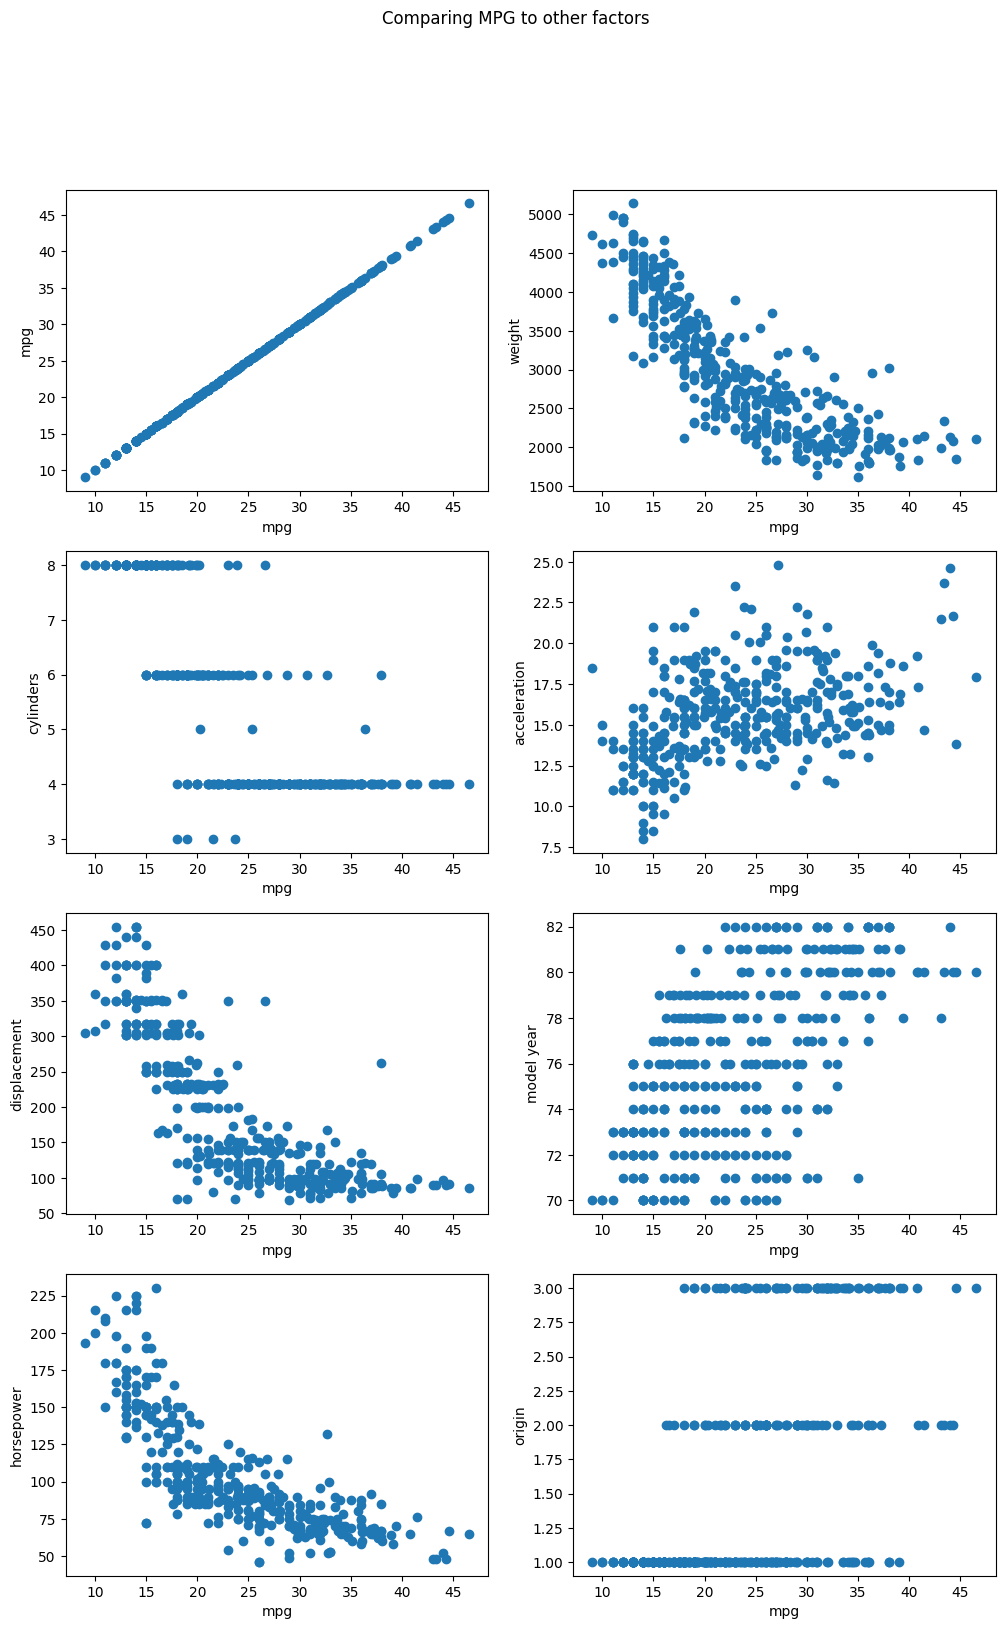

In [50]:
# Make an x by y grid of plots
# Note the variables are n-1 the plots you actually get (so this gives 4x2)
x_plots = 3
y_plots = 1
fig, ax = plt.subplots(x_plots+1, y_plots+1, figsize=(12, 18))
plt.suptitle("Comparing MPG to other factors")

# Fill them in (using loops, so I don't have to copy-paste as much)
i = 0
j = 0
for dataset in df.columns:
    # Ignoring car name
    if dataset == 'car name':
        continue
    # Make sure everything is numeric
    df[dataset] = pd.to_numeric(df[dataset], errors='coerce')
    # clean up the horsepower data
    if dataset == 'horsepower':
        horse_med = df[dataset].median()
        df[dataset].fillna(horse_med)
    ax[i][j].plot(df['mpg'], df[dataset], 'o', label='data')
    ax[i][j].set_xlabel('mpg')
    ax[i][j].set_ylabel(dataset)
    if i < x_plots:
        i += 1
    else:
        j += 1
        i = 0

3) Create NORMALIZED column data for each of the factors, as we did in the
example presented in class.

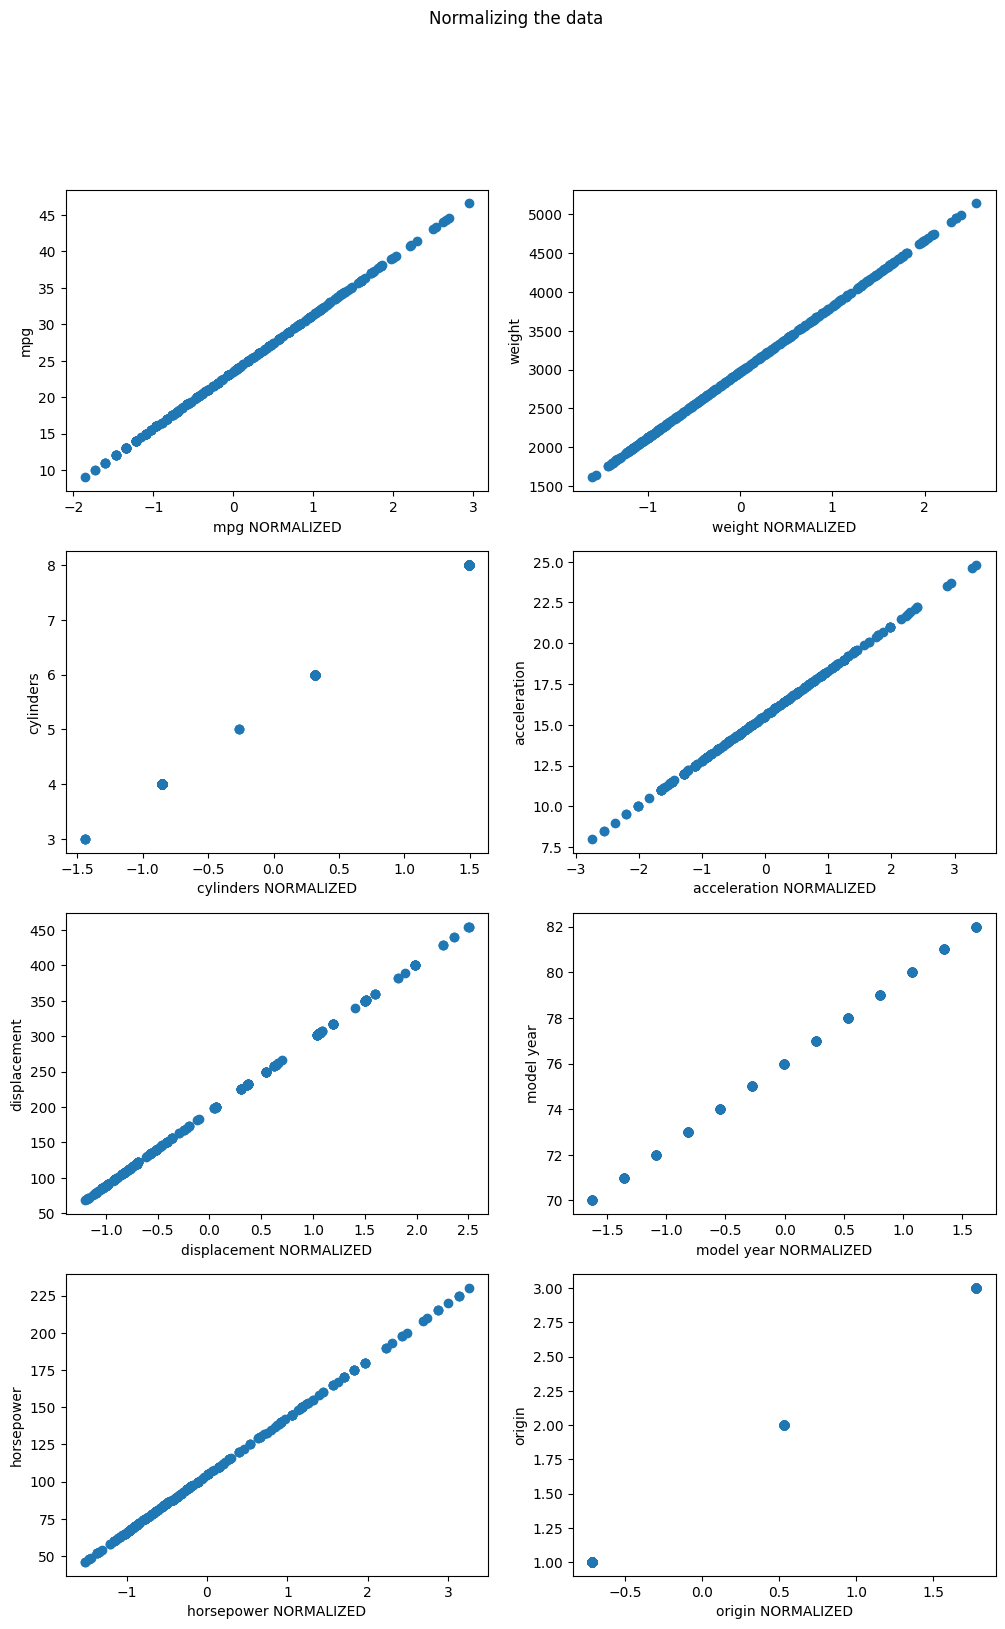

In [51]:
# Use this loop again
fig, ax = plt.subplots(x_plots+1, y_plots+1, figsize=(12, 18))
plt.suptitle("Normalizing the data")

# Fill them in (using loops, so I don't have to copy-paste as much)
i = 0
j = 0
for dataset in df.columns:
    # Ignoring car name
    if dataset == 'car name':
        continue
    # Normalize now
    df[f"{dataset}_normalized"] = (df[dataset] - df[dataset].mean()) / df[dataset].std()
    ax[i][j].plot(df[f"{dataset}_normalized"], df[dataset], 'o')
    ax[i][j].set_xlabel(f"{dataset} NORMALIZED")
    ax[i][j].set_ylabel(dataset)
    if i < x_plots:
        i += 1
    else:
        j += 1
        i = 0

These look nice and linear (although the height example looked rather chaotic)